2023-01-10 <br/>
Bird FeederWatch data <br/>
https://github.com/rfordatascience/tidytuesday/tree/master/data/2023/2023-01-10

Using Map Image on Scatter Plot - Completed 

https://community.plotly.com/t/put-images-inside-bubbles/41364/6

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv')
df.head()

,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,Month,Day,Year,...,how_many,valid,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method
0,L981010,52.129760,-122.135470,CA-BC,POSTCODE LAT/LONG LOOKUP,S83206450,OBS1092604618,3,4,2021,...,20,1,0,1,0,1,0,1.001,5.0,PFW Web 4.1.4
1,L3161698,43.832207,-123.092405,US-OR,/GOOGLE_MAP/ZOOM:18,S78031190,OBS1036509564,12,19,2020,...,11,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4
2,L13210778,39.721470,-75.933660,US-MD,/GOOGLE_MAP/ZOOM:15,S81318993,OBS1073386105,2,13,2021,...,2,1,0,1,1,1,1,8.001,5.0,PFW Web 4.1.4
3,L13258348,42.217874,-83.672300,US-MI,/GOOGLE_MAP/ZOOM:15,S79251313,OBS1051702542,1,13,2021,...,2,1,0,1,1,1,1,4.001,0.0,PFW Web 4.1.4
4,L149639,32.749921,-79.941582,US-SC,PointMaker1.0_2,S79183993,OBS1050809672,1,11,2021,...,10,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4


In [3]:
# Special thanks to @CivilServiceUSA for the map-level data
df_maps= pd.read_csv("https://raw.githubusercontent.com/CivilServiceUSA/us-states/master/data/states.csv") 
df_maps.head()

,state,slug,code,nickname,website,admission_date,admission_number,capital_city,capital_url,population,population_rank,constitution_url,state_flag_url,state_seal_url,map_image_url,landscape_background_url,skyline_background_url,twitter_url,facebook_url
0,Alabama,alabama,AL,Yellowhammer State,http://www.alabama.gov,1819-12-14,22,Montgomery,http://www.montgomeryal.gov,4833722,23,http://alisondb.legislature.state.al.us/alison...,https://cdn.civil.services/us-states/flags/ala...,https://cdn.civil.services/us-states/seals/ala...,https://cdn.civil.services/us-states/maps/alab...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/alabamagov,https://www.facebook.com/alabamagov
1,Alaska,alaska,AK,The Last Frontier,http://alaska.gov,1959-01-03,49,Juneau,http://www.juneau.org,735132,47,http://www.legis.state.ak.us/basis/folioproxy....,https://cdn.civil.services/us-states/flags/ala...,https://cdn.civil.services/us-states/seals/ala...,https://cdn.civil.services/us-states/maps/alas...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/alaska,https://www.facebook.com/AlaskaLocalGovernments
2,Arizona,arizona,AZ,The Grand Canyon State,https://az.gov,1912-02-14,48,Phoenix,https://www.phoenix.gov,6626624,15,http://www.azleg.gov/Constitution.asp,https://cdn.civil.services/us-states/flags/ari...,https://cdn.civil.services/us-states/seals/ari...,https://cdn.civil.services/us-states/maps/ariz...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,NaN,NaN
3,Arkansas,arkansas,AR,The Natural State,http://arkansas.gov,1836-06-15,25,Little Rock,http://www.littlerock.org,2959373,32,http://www.arkleg.state.ar.us/assembly/Summary...,https://cdn.civil.services/us-states/flags/ark...,https://cdn.civil.services/us-states/seals/ark...,https://cdn.civil.services/us-states/maps/arka...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/arkansasgov,https://www.facebook.com/Arkansas.gov
4,California,california,CA,Golden State,http://www.ca.gov,1850-09-09,31,Sacramento,http://www.cityofsacramento.org,38332521,1,http://www.leginfo.ca.gov/const-toc.html,https://cdn.civil.services/us-states/flags/cal...,https://cdn.civil.services/us-states/seals/cal...,https://cdn.civil.services/us-states/maps/cali...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/cagovernment,NaN


In [4]:
df_usa = df[df.subnational1_code.str.contains('US', regex=False)==True]
df_usa["states"] = df_usa.subnational1_code.str[-2:]

C:\Users\shawn\AppData\Local\Temp\ipykernel_1624\2235590939.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
df_merged = df_usa.merge(df_maps,how="left",left_on="states",right_on = "code" ).reset_index(drop=True)
df_merged.head()

,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,Month,Day,Year,...,population,population_rank,constitution_url,state_flag_url,state_seal_url,map_image_url,landscape_background_url,skyline_background_url,twitter_url,facebook_url
0,L3161698,43.832207,-123.092405,US-OR,/GOOGLE_MAP/ZOOM:18,S78031190,OBS1036509564,12,19,2020,...,3930065.0,27.0,http://bluebook.state.or.us/state/constitution...,https://cdn.civil.services/us-states/flags/ore...,https://cdn.civil.services/us-states/seals/ore...,https://cdn.civil.services/us-states/maps/oreg...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,NaN,NaN
1,L13210778,39.721470,-75.933660,US-MD,/GOOGLE_MAP/ZOOM:15,S81318993,OBS1073386105,2,13,2021,...,5928814.0,19.0,http://msa.maryland.gov/msa/mdmanual/43const/h...,https://cdn.civil.services/us-states/flags/mar...,https://cdn.civil.services/us-states/seals/mar...,https://cdn.civil.services/us-states/maps/mary...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/statemaryland,https://www.facebook.com/statemaryland
2,L13258348,42.217874,-83.672300,US-MI,/GOOGLE_MAP/ZOOM:15,S79251313,OBS1051702542,1,13,2021,...,9895622.0,9.0,http://www.legislature.mi.gov/(S(hrowl12tg05he...,https://cdn.civil.services/us-states/flags/mic...,https://cdn.civil.services/us-states/seals/mic...,https://cdn.civil.services/us-states/maps/mich...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/migov,https://www.facebook.com/MIgovernment
3,L149639,32.749921,-79.941582,US-SC,PointMaker1.0_2,S79183993,OBS1050809672,1,11,2021,...,4774839.0,24.0,http://www.scstatehouse.gov/scconstitution/scc...,https://cdn.civil.services/us-states/flags/sou...,https://cdn.civil.services/us-states/seals/sou...,https://cdn.civil.services/us-states/maps/sout...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/scgov,http://www.facebook.com/pages/SCgov/12752057990
4,L74629,37.711377,-122.074557,US-CA,POSTCODE LAT/LONG LOOKUP,S85555888,OBS1121406888,1,23,2021,...,38332521.0,1.0,http://www.leginfo.ca.gov/const-toc.html,https://cdn.civil.services/us-states/flags/cal...,https://cdn.civil.services/us-states/seals/cal...,https://cdn.civil.services/us-states/maps/cali...,https://cdn.civil.services/us-states/backgroun...,https://cdn.civil.services/us-states/backgroun...,https://twitter.com/cagovernment,NaN


In [6]:
df_grouped = df_merged.groupby(['code','state_flag_url'], as_index=False).agg({"how_many":"mean","species_code":"nunique","population":"mean"})
df_grouped.head()

,code,state_flag_url,how_many,species_code,population
0,AK,https://cdn.civil.services/us-states/flags/ala...,5.441315,37,735132.0
1,AL,https://cdn.civil.services/us-states/flags/ala...,3.408318,52,4833722.0
2,AR,https://cdn.civil.services/us-states/flags/ark...,4.117143,42,2959373.0
3,AZ,https://cdn.civil.services/us-states/flags/ari...,4.371227,97,6626624.0
4,CA,https://cdn.civil.services/us-states/flags/cal...,3.675409,121,38332521.0


In [7]:
import numpy as np 


fig = px.scatter(
    df_grouped,
    x="species_code",
    y="how_many",
    hover_name="code",
    hover_data=["species_code", "population","how_many"],
)
fig.update_traces(marker_color="rgba(0,0,0,0)")

minDim = df_grouped[["species_code", "how_many"]].max().idxmax()
maxi = df_grouped[minDim].max()
for i, row in df_grouped.iterrows():
    fig.add_layout_image(
        dict(
            source=row["state_flag_url"],
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["species_code"],
            y=row["how_many"],
            sizex=np.sqrt(row["population"] / df_grouped["population"].max()) * maxi * 0.15 + maxi * 0.03,
            sizey=np.sqrt(row["population"] / df_grouped["population"].max()) * maxi * 0.15+ maxi * 0.03,
            sizing="contain",
            opacity=0.8,
            layer="above"

        )
    )

fig.update_layout(height=600, width=1000, plot_bgcolor="#dfdfdf",title = "Comparing Average Observations with Unique Species Discovered by State (Weighed by Total Population) ")

fig.show()

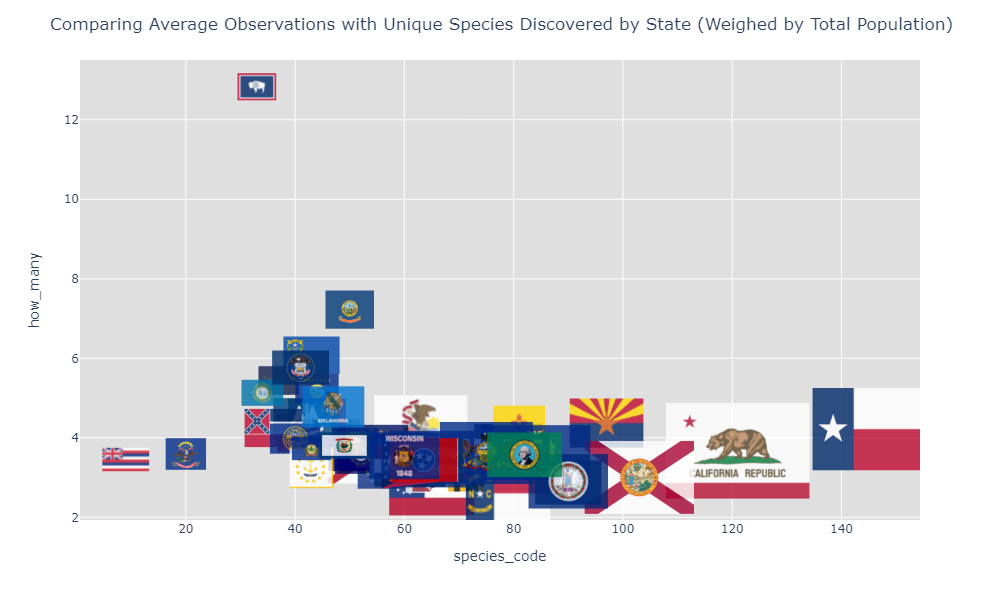

In [8]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)